In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
'''
The grid has 25 possible variations , each is 5x5 , then total states are 500 
Actions : There are 6 possible actions, corresponding to moving North, East, 
South, or West, picking up the passenger, and dropping off the passenger , 
The rewards are -1 for moving , -10 for dropping off the passenger at the wrong place , 20 to drop at the right destination
'''
env = gym.make('Taxi-v3')
inital_state = env.reset() # create a new instance of taxi, and get the initial state


C:\Users\antoz\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
n_states, n_actions = env.observation_space.n, env.action_space.n
lr=0.9
discount_rate=0.8
epsilon=1
decay_rate = 0.07

In [4]:
def init_q(n_states , n_actions):
    Q=np.zeros((n_states,n_actions))
    return Q

In [5]:
# def exponential_decay_epsilon(Q_table ,epsilon ,n_actions , current_state , episode_num):
#     """
#     explore more on early stages , explore less later on
#     """
#     epsilon=np.exp(-decay_rate * episode_num)
#     print(epsilon)
#     if np.random.rand(1) > epsilon:
#         return np.argmax(Q_table[current_state])
#     else :
#         return env.action_space.sample()
    
def epsilon_greedy(Q, epsilon, n_actions, s):
    if  np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action
'''
Use either one of them , exp decay takes more time to converge
'''

'\nUse either one of them , exp decay takes more time to converge\n'

In [6]:
epochs=5000
iterations=2500
Q_table=init_q(n_states , n_actions)
total_rewards=[]
for i in range(epochs):
    
    old_state = env.reset()

    for i in range(iterations):

        action = epsilon_greedy(Q_table ,epsilon , n_actions , old_state)
          
        new_state, reward, done, info = env.step(action)
        
        if not done :
            Q_table[old_state,action] += lr * ( reward + (discount_rate * np.max(Q_table[new_state , :])) - Q_table[old_state,action])
            total_rewards.append(reward)
            old_state=new_state
        if done:
            Q_table[old_state,action] += lr*( reward - Q_table[old_state,action])
            total_rewards.append(reward)
            old_state=new_state
            break

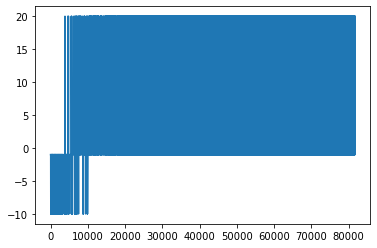

In [7]:
plt.plot(total_rewards)

(array([  772.,     0.,     0., 75930.,     0.,     0.,     0.,     0.,
            0.,  4962.]),
 array([-10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.]),
 <BarContainer object of 10 artists>)

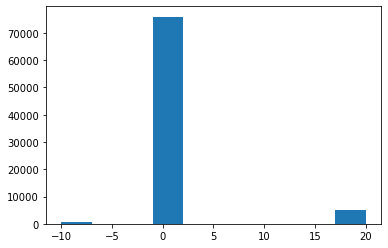

In [8]:
plt.hist(total_rewards)